This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# xarray CfRadial2 backend

In this example, we read CfRadial2 data files using the xarray `cfradial2` backend.

In [1]:
import wradlib as wrl
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import xradar as xd
import datatree as xt
import xarray as xr

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

## Load CfRadial2 Volume Data

In [2]:
fpath = "netcdf/cfrad.20080604_002217_000_SPOL_v36_SUR_cfradial2.nc"
f = wrl.util.get_wradlib_data_file(fpath)
vol = xt.open_datatree(f)

In [3]:
# fix: remove when available in xradar
for k in vol.groups[1:]:
    vol[k].ds = (
        vol[k]
        .ds.assign(sweep_fixed_angle=vol[k].ds.attrs["fixed_angle"])
        .swap_dims(time="azimuth")
        .sortby("azimuth")
    )

### Inspect RadarVolume

In [4]:
display(vol)

DataTree('None', parent=None)
│   Dimensions:              (sweep: 9)
│   Coordinates:
│       sweep_mode           object ...
│       longitude            float64 ...
│       altitude             float64 ...
│       time                 datetime64[ns] ...
│       latitude             float64 ...
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 ...
│       platform_type        object ...
│       instrument_type      object ...
│       primary_axis         object ...
│       time_coverage_start  object ...
│       time_coverage_end    object ...
│       sweep_group_name     (sweep) object ...
│       sweep_fixed_angle    (sweep) float64 ...
│   Attributes:
│       version:          2.0
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using wradlib
│       instrument_name:  None
│       fixed_angle:      0.5
│       Conventions:      Cf/Radial
├── DataTree('sweep_0')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          object ...
│           time                (azimuth) datetime64[ns] 2008-06-04T00:15:34 ... 2008...
│         * range               (range) float32 150.0 300.0 ... 1.492e+05 1.494e+05
│         * azimuth             (azimuth) float32 0.0 0.75 1.5 ... 357.8 358.5 359.2
│           elevation           (azimuth) float32 ...
│           longitude           float64 ...
│           latitude            float64 ...
│           altitude            float64 ...
│       Data variables: (12/17)
│           sweep_number        int32 ...
│           polarization_mode   |S32 ...
│           prt_mode            |S32 ...
│           follow_mode         |S32 ...
│           fixed_angle         float32 ...
│           target_scan_rate    float32 ...
│           ...                  ...
│           n_samples           (azimuth) int32 ...
│           r_calib_index       (azimuth) int8 ...
│           scan_rate           (azimuth) float32 ...
│           DBZ                 (azimuth, range) float32 ...
│           VR                  (azimuth, range) float32 ...
│           sweep_fixed_angle   float64 0.5
│       Attributes:
│           fixed_angle:  0.5
├── DataTree('sweep_1')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          object ...
│           time                (azimuth) datetime64[ns] 2008-06-04T00:16:21 ... 2008...
│         * range               (range) float32 150.0 300.0 ... 1.492e+05 1.494e+05
│         * azimuth             (azimuth) float32 0.0 0.75 1.5 ... 357.8 358.5 359.2
│           elevation           (azimuth) float32 ...
│           longitude           float64 ...
│           latitude            float64 ...
│           altitude            float64 ...
│       Data variables: (12/17)
│           sweep_number        int32 ...
│           polarization_mode   |S32 ...
│           prt_mode            |S32 ...
│           follow_mode         |S32 ...
│           fixed_angle         float32 ...
│           target_scan_rate    float32 ...
│           ...                  ...
│           n_samples           (azimuth) int32 ...
│           r_calib_index       (azimuth) int8 ...
│           scan_rate           (azimuth) float32 ...
│           DBZ                 (azimuth, range) float32 ...
│           VR                  (azimuth, range) float32 ...
│           sweep_fixed_angle   float64 1.1
│       Attributes:
│           fixed_angle:  1.1
├── DataTree('sweep_2')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          object ...
│           time                (azimuth) datetime64[ns] 2008-06-04T00:17:07 ... 2008...
│         * range               (range) float32 150.0 300.0 ... 1.492e+05 1.494e+05
│         * azimuth             (azimuth) float32 0.0 0.75 1.5

### Inspect root group

The `sweep` dimension contains the number of scans in this radar volume. Further the dataset consists of variables (location coordinates, time_coverage) and attributes (Conventions, metadata).

In [5]:
vol.root

DataTree('None', parent=None)
│   Dimensions:              (sweep: 9)
│   Coordinates:
│       sweep_mode           object ...
│       longitude            float64 ...
│       altitude             float64 ...
│       time                 datetime64[ns] ...
│       latitude             float64 ...
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 ...
│       platform_type        object ...
│       instrument_type      object ...
│       primary_axis         object ...
│       time_coverage_start  object ...
│       time_coverage_end    object ...
│       sweep_group_name     (sweep) object ...
│       sweep_fixed_angle    (sweep) float64 ...
│   Attributes:
│       version:          2.0
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using wradlib
│       instrument_name:  None
│       fixed_angle:      0.5
│       Conventions:      Cf/Radial
├── DataTree('sweep_0')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          object ...
│           time                (azimuth) datetime64[ns] 2008-06-04T00:15:34 ... 2008...
│         * range               (range) float32 150.0 300.0 ... 1.492e+05 1.494e+05
│         * azimuth             (azimuth) float32 0.0 0.75 1.5 ... 357.8 358.5 359.2
│           elevation           (azimuth) float32 ...
│           longitude           float64 ...
│           latitude            float64 ...
│           altitude            float64 ...
│       Data variables: (12/17)
│           sweep_number        int32 ...
│           polarization_mode   |S32 ...
│           prt_mode            |S32 ...
│           follow_mode         |S32 ...
│           fixed_angle         float32 ...
│           target_scan_rate    float32 ...
│           ...                  ...
│           n_samples           (azimuth) int32 ...
│           r_calib_index       (azimuth) int8 ...
│           scan_rate           (azimuth) float32 ...
│           DBZ                 (azimuth, range) float32 ...
│           VR                  (azimuth, range) float32 ...
│           sweep_fixed_angle   float64 0.5
│       Attributes:
│           fixed_angle:  0.5
├── DataTree('sweep_1')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          object ...
│           time                (azimuth) datetime64[ns] 2008-06-04T00:16:21 ... 2008...
│         * range               (range) float32 150.0 300.0 ... 1.492e+05 1.494e+05
│         * azimuth             (azimuth) float32 0.0 0.75 1.5 ... 357.8 358.5 359.2
│           elevation           (azimuth) float32 ...
│           longitude           float64 ...
│           latitude            float64 ...
│           altitude            float64 ...
│       Data variables: (12/17)
│           sweep_number        int32 ...
│           polarization_mode   |S32 ...
│           prt_mode            |S32 ...
│           follow_mode         |S32 ...
│           fixed_angle         float32 ...
│           target_scan_rate    float32 ...
│           ...                  ...
│           n_samples           (azimuth) int32 ...
│           r_calib_index       (azimuth) int8 ...
│           scan_rate           (azimuth) float32 ...
│           DBZ                 (azimuth, range) float32 ...
│           VR                  (azimuth, range) float32 ...
│           sweep_fixed_angle   float64 1.1
│       Attributes:
│           fixed_angle:  1.1
├── DataTree('sweep_2')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          object ...
│           time                (azimuth) datetime64[ns] 2008-06-04T00:17:07 ... 2008...
│         * range               (range) float32 150.0 300.0 ... 1.492e+05 1.494e+05
│         * azimuth             (azimuth) float32 0.0 0.75 1.5

### Inspect sweep group(s)

The sweep-groups can be accessed via their respective keys. The dimensions consist of `range` and `time` with added coordinates `azimuth`, `elevation`, `range` and `time`. There will be variables like radar moments (DBZH etc.) and sweep-dependend metadata (like `fixed_angle`, `sweep_mode` etc.).

In [6]:
display(vol["sweep_0"])

DataTree('sweep_0', parent="None")
    Dimensions:             (azimuth: 480, range: 996)
    Coordinates:
        sweep_mode          object ...
        time                (azimuth) datetime64[ns] 2008-06-04T00:15:34 ... 2008...
      * range               (range) float32 150.0 300.0 ... 1.492e+05 1.494e+05
      * azimuth             (azimuth) float32 0.0 0.75 1.5 ... 357.8 358.5 359.2
        elevation           (azimuth) float32 ...
        longitude           float64 ...
        latitude            float64 ...
        altitude            float64 ...
    Data variables: (12/17)
        sweep_number        int32 ...
        polarization_mode   |S32 ...
        prt_mode            |S32 ...
        follow_mode         |S32 ...
        fixed_angle         float32 ...
        target_scan_rate    float32 ...
        ...                  ...
        n_samples           (azimuth) int32 ...
        r_calib_index       (azimuth) int8 ...
        scan_rate           (azimuth) float32 ...
        DBZ                 (azimuth, range) float32 ...
        VR                  (azimuth, range) float32 ...
        sweep_fixed_angle   float64 0.5
    Attributes:
        fixed_angle:  0.5

### Goereferencing

In [7]:
swp = vol["sweep_0"].ds.copy()
swp = swp.assign_coords(sweep_mode=swp.sweep_mode)
swp = swp.wrl.georef.georeference()

### Plotting

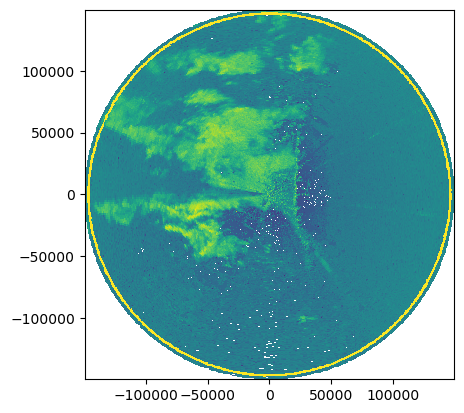

In [8]:
swp.DBZ.wrl.vis.plot()

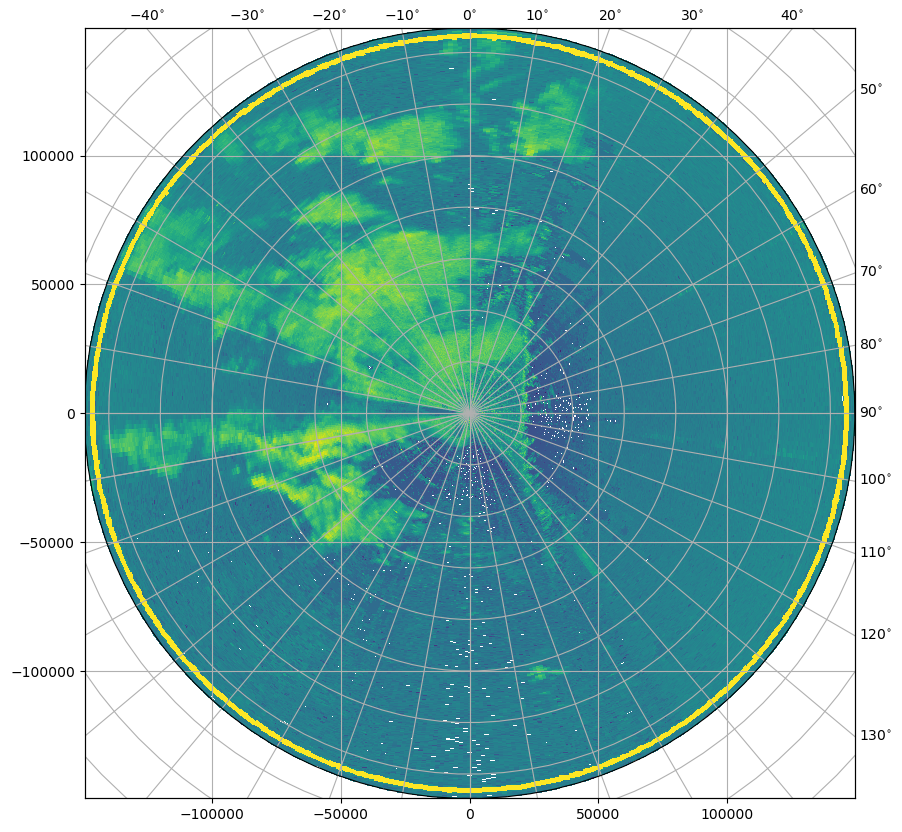

In [9]:
fig = plt.figure(figsize=(10, 10))
swp.DBZ.wrl.vis.plot(crs="cg", fig=fig)

In [10]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

map_trans = ccrs.AzimuthalEquidistant(
    central_latitude=swp.latitude.values, central_longitude=swp.longitude.values
)

< GeoAxes: +proj=aeqd +ellps=WGS84 +lon_0=120.43350219726562 +lat_0=22.52669906616211 +x_0=0.0 +y_0=0.0 +no_defs +type=crs >


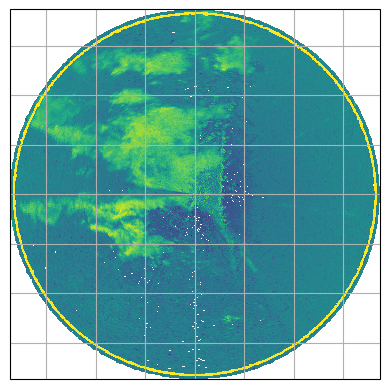

In [11]:
map_proj = ccrs.AzimuthalEquidistant(
    central_latitude=swp.latitude.values, central_longitude=swp.longitude.values
)
pm = swp.DBZ.wrl.vis.plot(crs=map_proj)
ax = plt.gca()
ax.gridlines(crs=map_proj)
print(ax)

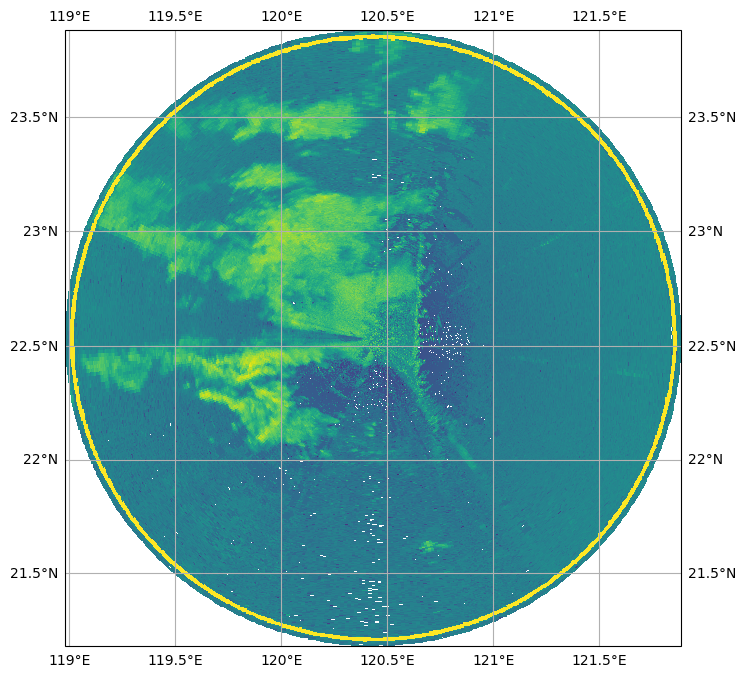

In [12]:
map_proj = ccrs.Mercator(central_longitude=swp.longitude.values)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=map_proj)
pm = swp.DBZ.wrl.vis.plot(ax=ax)
ax.gridlines(draw_labels=True)

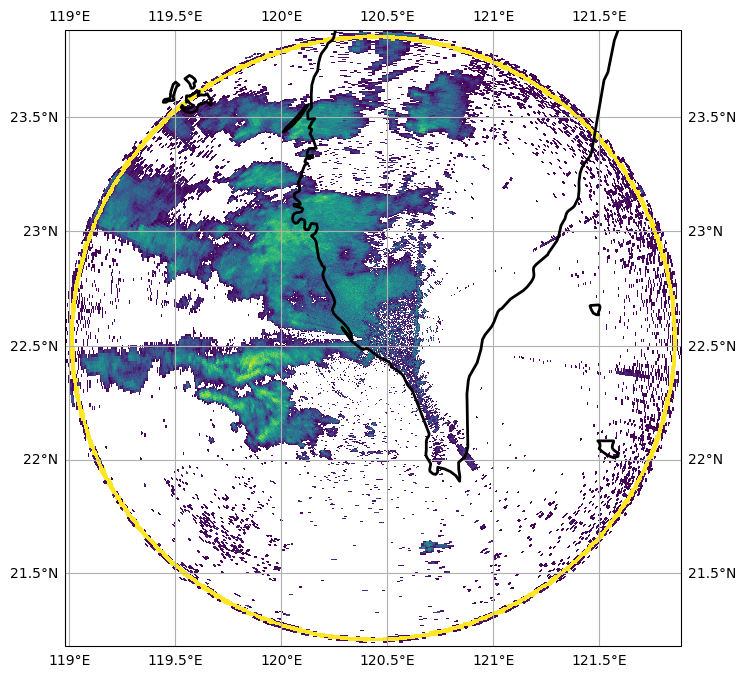

In [13]:
import cartopy.feature as cfeature


def plot_borders(ax):
    borders = cfeature.NaturalEarthFeature(
        category="physical", name="coastline", scale="10m", facecolor="none"
    )
    ax.add_feature(borders, edgecolor="black", lw=2, zorder=4)


map_proj = ccrs.Mercator(central_longitude=swp.longitude.values)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=map_proj)

DBZ = swp.DBZ
pm = DBZ.where(DBZ > 0).wrl.vis.plot(ax=ax)
plot_borders(ax)
ax.gridlines(draw_labels=True)

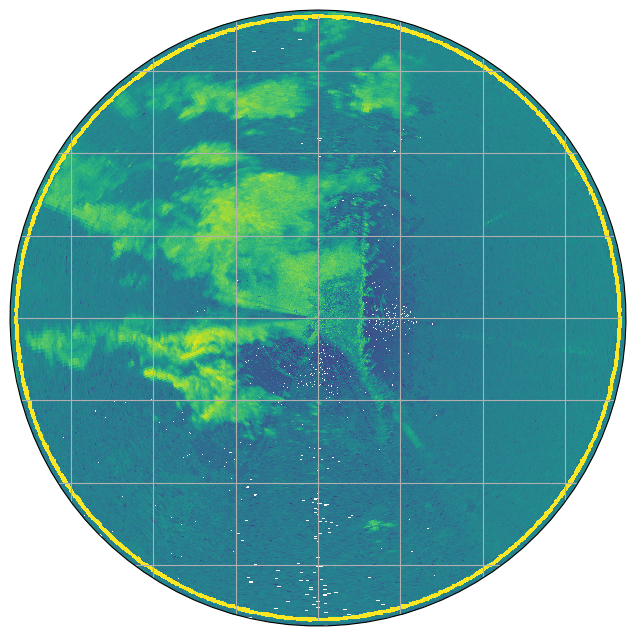

In [14]:
import matplotlib.path as mpath

theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

map_proj = ccrs.AzimuthalEquidistant(
    central_latitude=swp.latitude.values,
    central_longitude=swp.longitude.values,
)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=map_proj)
ax.set_boundary(circle, transform=ax.transAxes)

pm = swp.DBZ.wrl.vis.plot(crs=map_proj, ax=ax)
ax = plt.gca()
ax.gridlines(crs=map_proj)

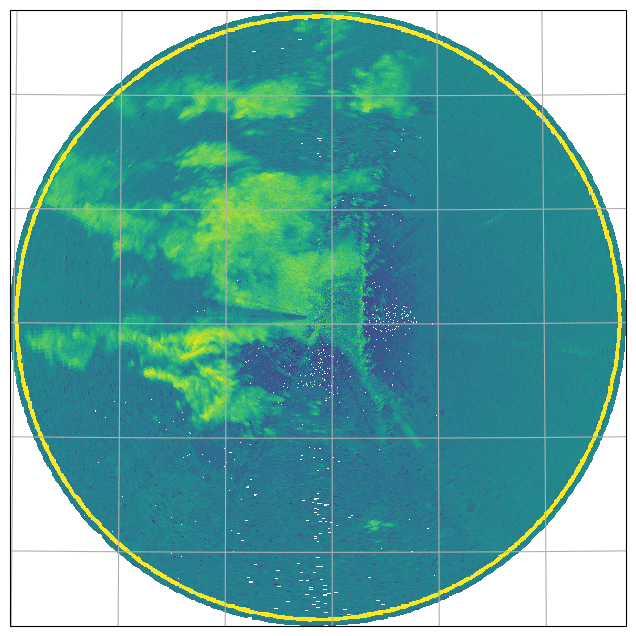

In [15]:
fig = plt.figure(figsize=(10, 8))
crs = ccrs.AzimuthalEquidistant(
    central_latitude=swp.latitude.values, central_longitude=swp.longitude.values
)
ax = fig.add_subplot(111, projection=crs)
pm = swp.DBZ.wrl.vis.plot(ax=ax)
ax.gridlines()

### Inspect radar moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset. There are attributes connected which are defined by Cf/Radial standard.

In [16]:
display(swp.DBZ)

<xarray.DataArray 'DBZ' (azimuth: 480, range: 996)>
array([[ 20.699957,  39.96934 ,  29.650644, ...,  -2.799595,  -3.549335,
         -1.650112],
       [ 13.829709,  35.710747,   8.869345, ..., -18.780428,  -3.080303,
         -4.519378],
       [ -9.129745,  14.810412,   4.539685, ...,   0.179822,  -0.550375,
         -3.519132],
       ...,
       [  5.889927,  26.049406,  32.379555, ...,  -2.550866,  -1.060269,
         -1.900617],
       [  0.959765,  23.579884,   9.29929 , ...,  -8.680257,  -5.039932,
         -2.410512],
       [ 20.079912,  39.15031 ,  13.190121, ...,  -4.91912 ,  -3.160252,
         -1.319658]], dtype=float32)
Coordinates: (12/15)
    sweep_mode   <U20 'azimuth_surveillance'
    time         (azimuth) datetime64[ns] 2008-06-04T00:15:34 ... 2008-06-04T...
  * range        (range) float32 150.0 300.0 450.0 ... 1.492e+05 1.494e+05
  * azimuth      (azimuth) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
    elevation    (azimuth) float32 0.5164 0.5219 0.5164 ... 0.5219 0.5219 0.5219
    longitude    float64 120.4
    ...           ...
    y            (azimuth, range) float32 150.0 300.0 ... 1.492e+05 1.493e+05
    z            (azimuth, range) float32 46.0 47.0 48.0 ... 2.714e+03 2.718e+03
    gr           (azimuth, range) float32 150.0 300.0 ... 1.492e+05 1.494e+05
    rays         (azimuth, range) float32 0.0 0.0 0.0 0.0 ... 359.2 359.2 359.2
    bins         (azimuth, range) float32 150.0 300.0 ... 1.492e+05 1.494e+05
    spatial_ref  int64 0
Attributes:
    long_name:             Computed Horizontal Co-polar Reflectivit
    standard_name:         equivalent_reflectivity_factor
    units:                 dBZ
    threshold_field_name:  
    threshold_value:       -9999.0
    sampling_ratio:        1.0
    grid_mapping:          grid_mapping

### Create simple plot

Using xarray features a simple plot can be created like this. Note the `sortby('time')` method, which sorts the radials by time.

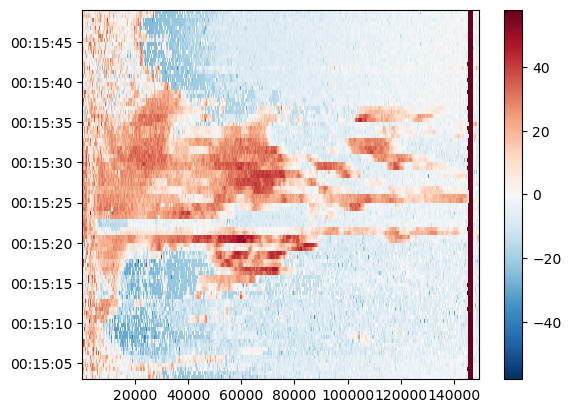

In [17]:
swp.DBZ.sortby("time").plot(x="range", y="time", add_labels=False)

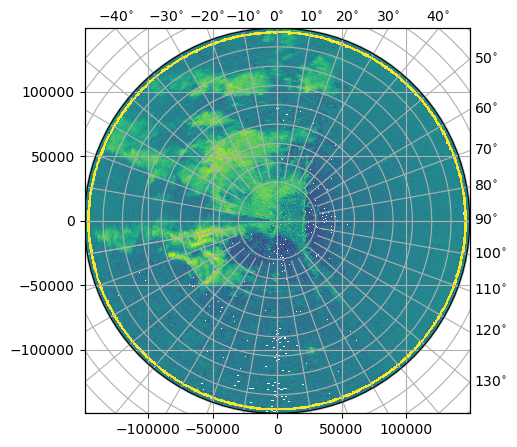

In [18]:
fig = plt.figure(figsize=(5, 5))
pm = swp.DBZ.wrl.vis.plot(crs={"latmin": 33e3}, fig=fig)

### Mask some values

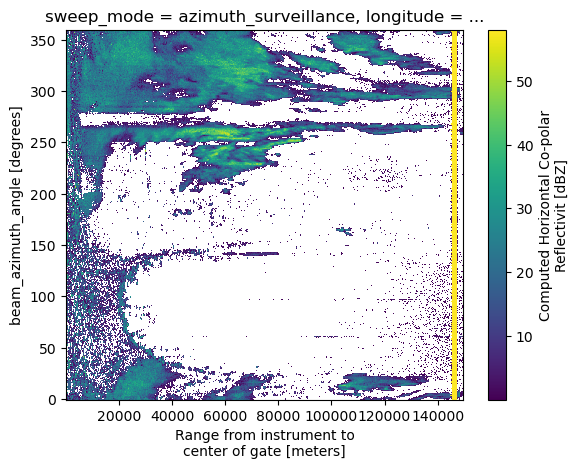

In [19]:
swp["DBZ"] = swp["DBZ"].where(swp["DBZ"] >= 0)
swp["DBZ"].plot()

In [20]:
vol

DataTree('None', parent=None)
│   Dimensions:              (sweep: 9)
│   Coordinates:
│       sweep_mode           object ...
│       longitude            float64 ...
│       altitude             float64 ...
│       time                 datetime64[ns] ...
│       latitude             float64 ...
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 ...
│       platform_type        object ...
│       instrument_type      object ...
│       primary_axis         object ...
│       time_coverage_start  object ...
│       time_coverage_end    object ...
│       sweep_group_name     (sweep) object ...
│       sweep_fixed_angle    (sweep) float64 ...
│   Attributes:
│       version:          2.0
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using wradlib
│       instrument_name:  None
│       fixed_angle:      0.5
│       Conventions:      Cf/Radial
├── DataTree('sweep_0')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          object ...
│           time                (azimuth) datetime64[ns] 2008-06-04T00:15:34 ... 2008...
│         * range               (range) float32 150.0 300.0 ... 1.492e+05 1.494e+05
│         * azimuth             (azimuth) float32 0.0 0.75 1.5 ... 357.8 358.5 359.2
│           elevation           (azimuth) float32 ...
│           longitude           float64 ...
│           latitude            float64 ...
│           altitude            float64 ...
│       Data variables: (12/17)
│           sweep_number        int32 ...
│           polarization_mode   |S32 ...
│           prt_mode            |S32 ...
│           follow_mode         |S32 ...
│           fixed_angle         float32 ...
│           target_scan_rate    float32 ...
│           ...                  ...
│           n_samples           (azimuth) int32 ...
│           r_calib_index       (azimuth) int8 ...
│           scan_rate           (azimuth) float32 ...
│           DBZ                 (azimuth, range) float32 ...
│           VR                  (azimuth, range) float32 ...
│           sweep_fixed_angle   float64 0.5
│       Attributes:
│           fixed_angle:  0.5
├── DataTree('sweep_1')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          object ...
│           time                (azimuth) datetime64[ns] 2008-06-04T00:16:21 ... 2008...
│         * range               (range) float32 150.0 300.0 ... 1.492e+05 1.494e+05
│         * azimuth             (azimuth) float32 0.0 0.75 1.5 ... 357.8 358.5 359.2
│           elevation           (azimuth) float32 ...
│           longitude           float64 ...
│           latitude            float64 ...
│           altitude            float64 ...
│       Data variables: (12/17)
│           sweep_number        int32 ...
│           polarization_mode   |S32 ...
│           prt_mode            |S32 ...
│           follow_mode         |S32 ...
│           fixed_angle         float32 ...
│           target_scan_rate    float32 ...
│           ...                  ...
│           n_samples           (azimuth) int32 ...
│           r_calib_index       (azimuth) int8 ...
│           scan_rate           (azimuth) float32 ...
│           DBZ                 (azimuth, range) float32 ...
│           VR                  (azimuth, range) float32 ...
│           sweep_fixed_angle   float64 1.1
│       Attributes:
│           fixed_angle:  1.1
├── DataTree('sweep_2')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          object ...
│           time                (azimuth) datetime64[ns] 2008-06-04T00:17:07 ... 2008...
│         * range               (range) float32 150.0 300.0 ... 1.492e+05 1.494e+05
│         * azimuth             (azimuth) float32 0.0 0.75 1.5

### Export to ODIM and CfRadial2

In [21]:
xd.io.to_odim(vol, "cfradial2_as_odim.h5", source="RAD:SPOLRVP8")
xd.io.to_cfradial2(vol, "cfradial2_as_cfradial2.nc")

### Import again

In [22]:
vola = xd.io.open_odim_datatree(
    "cfradial2_as_odim.h5",
    backend_kwargs=dict(reindex_angle=False),
)
display(vola)

DataTree('root', parent=None)
│   Dimensions:              ()
│   Data variables:
│       volume_number        int64 0
│       platform_type        <U5 'fixed'
│       instrument_type      <U5 'radar'
│       time_coverage_start  <U20 '2008-06-04T00:15:03Z'
│       time_coverage_end    <U20 '2008-06-04T00:22:15Z'
│       longitude            float64 120.4
│       altitude             float64 45.0
│       latitude             float64 22.53
│   Attributes:
│       Conventions:      ODIM_H5/V2_2
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using xradar
│       instrument_name:  None
├── DataTree('sweep_0')
│       Dimensions:            (azimuth: 480, range: 996)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.375 1.125 1.875 ... 358.1 358.9 359.6
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2008-06-04T00:15:33.522906624...
│         * range              (range) float32 150.0 300.0 450.0 ... 1.492e+05 1.494e+05
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│       Data variables:
│           DBZ                (azimuth, range) float32 ...
│           VR                 (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_1')
│       Dimensions:            (azimuth: 480, range: 996)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.375 1.125 1.875 ... 358.1 358.9 359.6
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2008-06-04T00:16:22.207326720...
│         * range              (range) float32 150.0 300.0 450.0 ... 1.492e+05 1.494e+05
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│       Data variables:
│           DBZ                (azimuth, range) float32 ...
│           VR                 (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_2')
│       Dimensions:            (azimuth: 480, range: 996)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.375 1.125 1.875 ... 358.1 358.9 359.6
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2008-06-04T00:17:08.053106688...
│         * range              (range) float32 150.0 300.0 450.0 ... 1.492e+05 1.494e+05
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│       Data variables:
│           DBZ                (azimuth, range) float32 ...
│           VR                 (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_3')
│       Dimensions:            (azimuth: 480, range: 996)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.375 1.125 1.875 ... 358.1 358.9 359.6
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2008-06-04T00:17:54.749973504...
│         * range              (range) float32 150.0 300.0 450.0 ... 1.492e+05 1.494e+05
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           

In [23]:
volb = xt.open_datatree("cfradial2_as_cfradial2.nc")
display(volb)

DataTree('None', parent=None)
│   Dimensions:              (sweep: 9)
│   Coordinates:
│       sweep_mode           object ...
│       longitude            float64 ...
│       altitude             float64 ...
│       time                 datetime64[ns] ...
│       latitude             float64 ...
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 ...
│       platform_type        object ...
│       instrument_type      object ...
│       primary_axis         object ...
│       time_coverage_start  object ...
│       time_coverage_end    object ...
│       sweep_group_name     (sweep) object ...
│       sweep_fixed_angle    (sweep) float64 ...
│   Attributes:
│       version:          2.0
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None: xradar v0.3.0 CfRadial2 export
│       comment:          im/exported using wradlib
│       instrument_name:  None
│       fixed_angle:      0.5
│       Conventions:      Cf/Radial
├── DataTree('sweep_0')
│       Dimensions:            (time: 480, range: 996)
│       Coordinates:
│           sweep_mode         object ...
│         * time               (time) datetime64[ns] 2008-06-04T00:15:03 ... 2008-06-...
│         * range              (range) float32 150.0 300.0 450.0 ... 1.492e+05 1.494e+05
│           azimuth            (time) float32 ...
│           elevation          (time) float32 ...
│       Data variables:
│           sweep_number       int32 ...
│           prt_mode           |S32 ...
│           follow_mode        |S32 ...
│           DBZ                (time, range) float32 ...
│           VR                 (time, range) float32 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_1')
│       Dimensions:            (time: 480, range: 996)
│       Coordinates:
│           sweep_mode         object ...
│         * time               (time) datetime64[ns] 2008-06-04T00:15:50 ... 2008-06-...
│         * range              (range) float32 150.0 300.0 450.0 ... 1.492e+05 1.494e+05
│           azimuth            (time) float32 ...
│           elevation          (time) float32 ...
│       Data variables:
│           sweep_number       int32 ...
│           prt_mode           |S32 ...
│           follow_mode        |S32 ...
│           DBZ                (time, range) float32 ...
│           VR                 (time, range) float32 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_2')
│       Dimensions:            (time: 480, range: 996)
│       Coordinates:
│           sweep_mode         object ...
│         * time               (time) datetime64[ns] 2008-06-04T00:16:40 ... 2008-06-...
│         * range              (range) float32 150.0 300.0 450.0 ... 1.492e+05 1.494e+05
│           azimuth            (time) float32 ...
│           elevation          (time) float32 ...
│       Data variables:
│           sweep_number       int32 ...
│           prt_mode           |S32 ...
│           follow_mode        |S32 ...
│           DBZ                (time, range) float32 ...
│           VR                 (time, range) float32 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_3')
│       Dimensions:            (time: 480, range: 996)
│       Coordinates:
│           sweep_mode         object ...
│         * time               (time) datetime64[ns] 2008-06-04T00:17:27 ... 2008-06-...
│         * range              (range) float32 150.0 300.0 450.0 ... 1.492e+05 1.494e+05
│           azimuth            (time) float32 ...
│           elevation          (time) float32 ...
│       Data variables:
│           sweep_number       int32 ...
│           prt_mode           |S32 ...
│           follow_mode        |S32 ...
│           DBZ                (time, range) float32 ...
│           VR                 (time, range) float32 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_4')
│       Di